# <span style='color:Green'> Data Analysis using SQL </span>

## Motivation

I am undertaking this project with the goal of enhancing my understanding of data analysis and showcasing my proficiency in SQL. By utilizing the European Soccer Database, I aim to provide a comprehensive introduction to data analysis using SQL—an indispensable tool for every data scientist. The logic and principles behind SQL closely align with other popular data analysis tools like Excel and Pandas, making it an intuitive and essential skill for anyone working with data.

Through this project, I want to emphasize the practical application of SQL in the field of data science. I will leverage the real-world context of soccer-related data to demonstrate how SQL can be used to access, manipulate, and derive insights from complex datasets. By showcasing how SQL queries mirror the logic employed in other data analysis tools, I hope to make the learning process accessible and relatable to individuals familiar with those tools.

Furthermore, I believe that understanding SQL and its capabilities is pivotal for effective data exploration and analysis. By working on this project, I will be able to strengthen my logical thinking skills and deepen my knowledge of querying databases. This project not only provides an opportunity for hands-on learning but also enables me to build a valuable portfolio piece that highlights my data analysis and SQL proficiency.

Ultimately, my aim is to create an engaging and informative resource that introduces others to the power of SQL for data analysis. I am excited to embark on this journey of exploration and learning, and I look forward to sharing the insights and knowledge I gain along the way.

## Acknowledgments

In this endeavor, I am delving into the realm of crucial data science concepts, with a focus on SQL—a conceptual language tailored for seamlessly interacting with databases. Specifically, I am utilizing SQLite, a distinct implementation of SQL. It's noteworthy that most SQL languages share the capabilities discussed in this documentation. Discrepancies primarily lie in performance, advanced analytical functionalities, and, of course, pricing models.

The crux of our exploration lies in employing the SQL language to craft queries that fetch, manipulate, sort, and extract data residing within databases. Central to this pursuit are the tables within the database. These tables serve as repositories for the entirety of the stored data. A fundamental principle is to distribute data across multiple tables, ensuring a well-designed data structure. Much of this project's focus revolves around navigating and working with these tables.

Aside from tables, the database landscape is enriched with additional valuable concepts and features, albeit beyond the scope of this endeavor. A few notable areas that won't be covered include:

Table Creation: Establishing the blueprint for data organization within tables.

Data Manipulation: Inserting and updating data within the database.

Functions: Utilizing functions to process input values and return manipulated outputs. A simple example could involve a function that trims whitespace from text.

In summary, my aim is to equip myself with a profound understanding of these essential data science components. By focusing on SQL and its practical implications, I aspire to demonstrate the power of data manipulation, analysis, and extraction—a skillset that holds great significance in the data science landscape. Through this project, I intend to not only bolster my own knowledge but also share insights that may benefit others keen on exploring the fascinating world of data analysis.

### Data Import Essentials

In [1]:
#Improts 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "../input/"  #Insert path here
database = path + 'database.sqlite'

### Connecting to DataBase

"The fundamental outline of the query is straightforward: I determine the desired output by specifying the elements to display following the SELECT statement. The asterisk '*' represents the inclusion of all available columns. Next, I identify the specific table of interest by employing the FROM statement. To refine the data selection, I incorporate conditions after WHERE, enabling me to extract the relevant information from the table(s).

The arrangement and sequence of these components bear significance, shaping the overall query. Additionally, the presence of spaces, new lines, capitalized terms, and indentation collectively contribute to enhancing code readability. By adhering to this structured approach, I ensure that the code is not only functional but also easy to comprehend. This practice forms an integral part of my efforts to cultivate effective data analysis skills."

In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### List of countries

"At its core, this represents the simplest form of a query. The essential elements that comprise a query are the SELECT and FROM clauses. These components are indispensable when retrieving data from a table. This minimalist structure forms the foundation upon which more intricate queries can be built, allowing for seamless data extraction and analysis."

In [3]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### List of leagues and their country 

Embarking on this journey, I delve into the realm of data connectivity, guided by the essential concept of JOIN in SQL. JOIN serves as the pivotal bridge that connects two tables, forging a meaningful relationship between them. This mechanism comes into play when a common key exists within both tables, enabling a seamless fusion of their contents.

Understanding the profound significance of keys is paramount in establishing these connections. A key serves as a unique identifier for each record (row) within a table. It can be a single value, often an ID, or a combination of values that hold uniqueness within the table.

In the process of joining disparate tables, certain crucial steps must be followed:

1. **Choose the Join Type:** The choice of join type determines the nature of the connection. Common options include:
   - **INNER JOIN:** Retains only the records that satisfy the condition specified in the ON clause for both tables. Non-matching records are excluded.
   - **LEFT JOIN:** Preserves all values from the left table while combining them with matching rows from the right table. Columns from the right table lacking matching values on the left are populated with NULL.

2. **Specify the Common Value:** A shared value acts as the linchpin connecting the tables. In our case, it could be the unique identifier of a country, for instance.

3. **Ensure Key Existence:** At least one of the values used for joining must be a key within its respective table. In our context, the Country.id stands as a unique key, while the League.country_id might not be unique due to the possibility of multiple leagues existing within a single country.

JOIN operations, while immensely powerful, can also be fraught with pitfalls. Misapplying JOINs or misjudging their application is a prevalent and potentially perilous misstep when crafting intricate queries.

JOINs, and using them incorrectly, is the most common and dangerious mistake when writing complicated queries

In [4]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### List of teams

In SQL queries, precision in organizing and restricting output is achieved through the potent tools of ORDER BY and LIMIT. These commands play a pivotal role in shaping the final presentation of data, ensuring that insights are not only accurate but also focused.

The command ORDER BY takes center stage, dictating the arrangement of output rows. It empowers me to choose between ascending or descending sorting, ushering forth a logical and coherent display of information. Whether it's arranging records in alphabetical order, numerical progression, or other custom criteria, ORDER BY wields the power to bring clarity to the dataset.

Complementing ORDER BY is LIMIT, a directive that governs the quantity of rows making their way into the output. By skillfully applying LIMIT, I can exercise control over the extent of information presented, effectively curating the output to emphasize the most pertinent results.

These commands, when skillfully wielded, facilitate the art of precision data presentation. As venture into the intricacies of ORDER BY and LIMIT, equipped not only to harness their capabilities but also to strategically utilize them for a refined and insightful data analysis experience.

In [5]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### List of matches

In this illustrative example, our focus sharpens as we selectively unveil the columns of significance, casting aside the catch-all asterisk in favor of precise naming conventions. By employing this approach, we gain mastery over the specific elements that command our attention and align with our analytical pursuits.

A unique challenge emerges as we navigate cells that share identical names, notably Country.name and League.name. To circumvent ambiguity, we deftly wield the AS operator to bestow distinct aliases upon them, fostering clarity and precision within our data landscape.

The complexity of this query is apparent, an intricate web of joins interlacing the tables. The rationale lies in the database's star structure—a strategic design choice. The Match table houses the core "performance" data, enriched by keys and IDs, while descriptive particulars find their abode in ancillary tables such as Country, League, and Team.

Notably, the Team table takes center stage twice, a nuance that demands careful consideration. Though the table name remains constant, we introduce two separate instances (distinguished by AS) to cater to distinct values—home_team_api_id and away_team_api_id. This conscious duality underscores the necessity of differentiating these values, ensuring accurate representation.

A deliberate choice emerges in the form of a left join for the Team tables. This decision hinges on preserving match data within the output, even in scenarios where one of the teams remains absent from the Team table—an assertion of data integrity that echoes throughout the query.

As our narrative unfolds, ORDER takes its place, orchestrating the arrangement of the output. This pivotal command precedes LIMIT, dictating the confines of our insight, while following in the footsteps of WHERE—another essential component that shapes our data narrative.

In [6]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


### Basic Analytics

Data aggregation—an integral step toward unraveling insights from a broader perspective. The shift from scrutinizing raw data to grouping it into distinct levels marks a pivotal transition in my analytical journey. Through this transformation, aim to extract meaningful patterns and trends by examining data at higher granularities.

In the context of this illustration, extend the groundwork laid by previous queries. However, this time, the focus is on magnifying the analysis to the country-league-season level. This shift in perspective brings forth the powerful functionality of GROUP BY. This command, positioned between WHERE and ORDER, serves as a cornerstone for dissecting data into manageable segments.

Upon determining the level of analysis, the SELECT statement bifurcates into two crucial components:

1. **Dimensions:** These represent the descriptors that define the segments under scrutiny—essentially, the attributes by which we intend to group the data later.

2. **Metrics:** Metrics encompass numerical measures that offer a quantitative perspective on the data. The catch here is that metrics demand aggregation through functions like sum(), count(), avg(), and more.

It's imperative to maintain consistency between the dimensions chosen for the SELECT statement and those used in the GROUP BY clause. This alignment ensures accurate results, guarding against erroneous outcomes.

Beyond aggregation and grouping, the HAVING functionality emerges as a valuable tool. Positioned after grouping, HAVING introduces an additional layer of data filtering—this time, operating on the output of the grouped data. Often employed to refine results, HAVING contributes to a cleaner and more refined analytical outcome.

In [7]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


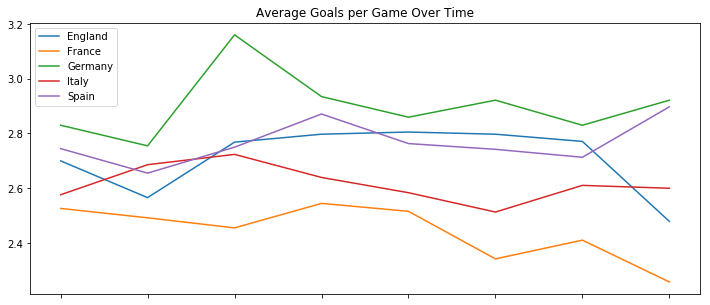

In [8]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

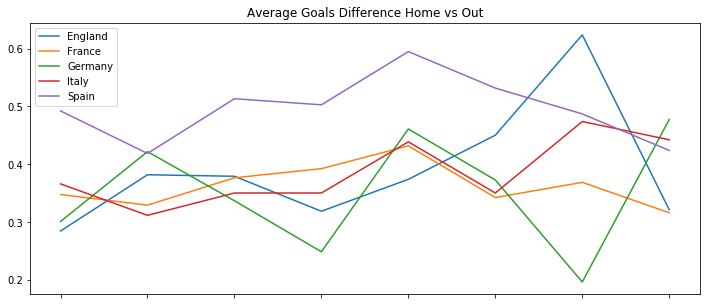

In [9]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

### Query Run Order

Stepping further into the query intricacies, unravel the sequence that governs the execution of SQL code—a fundamental understanding crucial for crafting effective and insightful queries.

In this pivotal phase of our exploration, I acquaint myself with the sequential order through which code operates, outlining a structured flow that ensures precision and meaningful analysis. The sequence unfolds as follows:

1. **SELECT:** Initiating the process, this stage lays the groundwork for selecting the specific columns or data attributes to be displayed.

2. **FROM:** Setting the stage for data retrieval, this step involves specifying the tables to be used and establishing connections between them. The foundation for data exploration takes shape here.

3. **JOIN:** Paving the way for comprehensive insights, the JOIN operation steps in, facilitating the merging of disparate tables through shared keys.

4. **WHERE:** Delving into data filtration, this phase selectively retains rows that align with specified conditions, refining the dataset.

5. **GROUP BY:** Elevating analysis to a higher plane, this component groups data based on chosen dimensions, offering a broader perspective on patterns and trends.

6. **HAVING:** Following grouping, HAVING contributes an additional layer of data filtering, honing in on specific aggregated conditions post-grouping.

7. **ORDER BY:** Shaping the presentation of insights, ORDER BY orchestrates the arrangement of output rows, enhancing readability and comprehension.

8. **LIMIT:** Concluding the journey, LIMIT governs the final scope of the output by capping the number of displayed rows, harmonizing with sorting and prior filtering.

This intricate process can be likened to a two-part symphony, where a new temporary table is crafted in memory, and subsequently, the desired information is gleaned from it. The first part encompasses:

- Choosing tables, establishing connections, and applying initial conditions (FROM + JOIN + WHERE)
- Grouping data based on desired levels (GROUP BY)

The second part revolves around the refined table and entails:

- Ordering the output for clarity (ORDER BY)
- Imposing additional post-grouping conditions (HAVING)
- Limiting the display to a specified number of rows, adhering to prior sorting and filtering (LIMIT)

### Sub Queries and Functions 

Leveraging the power of subqueries within SQL opens up a realm of advanced data manipulation, eliminating the reliance on external scripts. This tool is particularly indispensable when confronted with intricately structured tables that defy direct joins.

Our journey takes us to a scenario where we seek to unite two tables—one holding players' fundamental particulars, and the other housing a plethora of attributes. However, a roadblock emerges: the mismatched keys. While the former table boasts a single row for each player, the latter is keyed by player and season, resulting in a perilous cartesian product. This risks distorting averages and compromising the integrity of our analysis.

A remedy arises in the form of a subquery—an elegant solution to our conundrum. The pivotal step involves transforming the attributes table by grouping it to the player level, sans the seasonal distinction. Herein lies the importance of crafting a strategy for consolidating attributes—be it through averaging, selecting maximum values, or other pertinent methods.

With this synchronization achieved, the tables harmoniously merge through a join, guided by the subquery as a temporary entity. This strategic maneuver ensures the elimination of duplicate rows post-join, aligning the data for accurate and insightful analysis.

Furthermore, our exploration unveils the utilization of two distinct functions:

1. **Conditional Function:** A cornerstone of data manipulation, this tool ushers in conditional logic akin to IF statements in other languages. In SQLite, this functionality is orchestrated through a combination of CASE, WHEN, and ELSE statements. The dynamic nature of these conditions yields varying results based on input data, offering versatility and adaptability in analysis.

2. **ROUND Function:** Presenting a straightforward application, ROUND encapsulates the simplicity of rounding numerical values. This is just one of many invaluable functions that SQL languages inherently provide, enhancing the analytical toolkit at one's disposal.

In [10]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


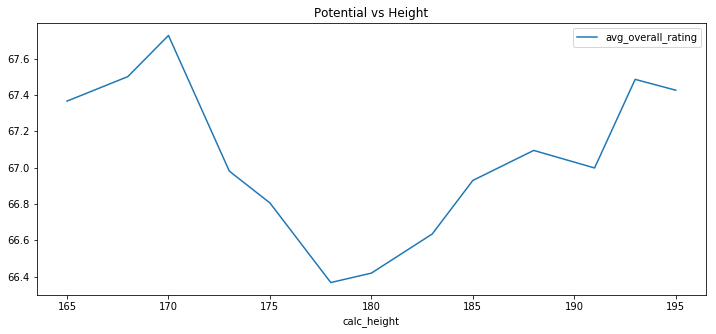

In [11]:
players_height.plot(x=['calc_height'],y=['avg_overall_rating'],figsize=(12,5),title='Potential vs Height')

#### Data Analysis using SQL

By : Gokul Raja 

Feel free to delve into the database schema, experiment with different query optimizations, and contribute to enhancing the database's efficiency and performance.

Contact me :<a href="https://github.com/Gokul-Raja84">Github</a> or <a href = "mailto: gokulraja840@gmail.com">Send Email</a>